# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [1]:
import math
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv("agaricus-lepiota.csv", delimiter=",")
print(df.shape)
df.describe()

(8124, 23)


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df_dummy = pd.get_dummies(df)

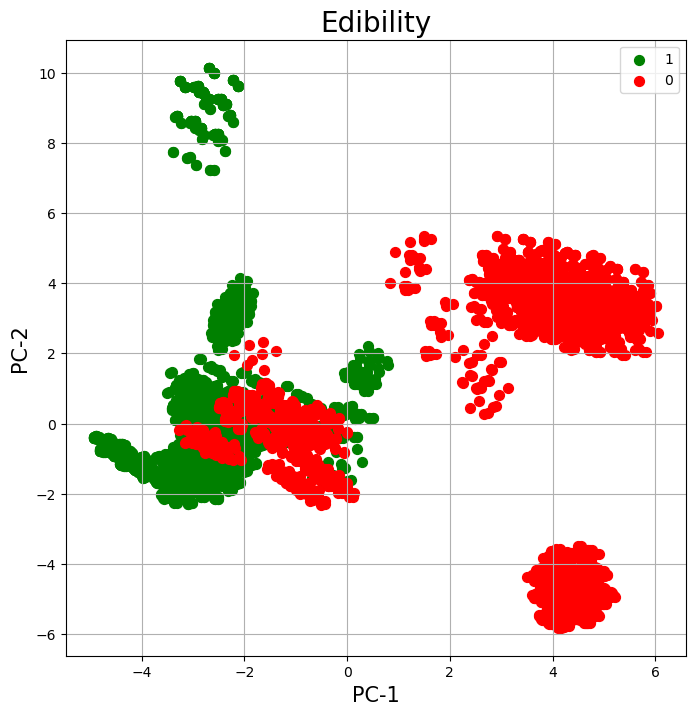

In [6]:
from sklearn.decomposition import PCA

# normalize data
from sklearn import preprocessing



data_scaled = pd.DataFrame(preprocessing.scale(df_dummy),columns = df_dummy.columns)

#Show grouping with reduction to two dimensions
# PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_scaled)
# Dump components relations with features
df_pc = pd.DataFrame(data = pca.transform(data_scaled),columns=['PC-1','PC-2'])
finalDf = pd.concat([df_pc, df_dummy[['edibility_e']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('Edibility', fontsize = 20)
targets = [1, 0]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['edibility_e'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

0      -2.199091
1      -4.027017
2      -4.927931
3      -2.359694
4      -3.072107
          ...   
8119   -2.587713
8120   -2.415846
8121   -2.966248
8122    3.864389
8123   -2.877580
Name: PC-1, Length: 8124, dtype: float64


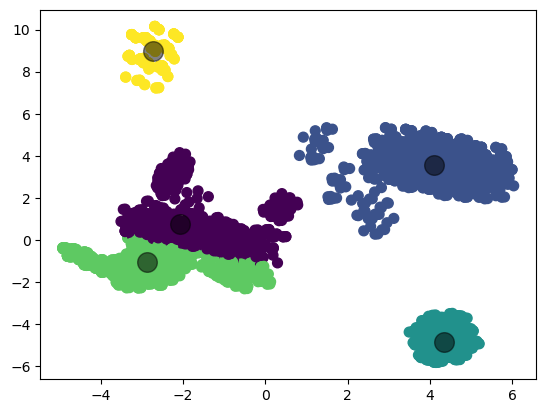

In [25]:
# K-means:
from sklearn.cluster import KMeans

X = finalDf
print(X.iloc[:,0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);